In [1]:
#决策树 线性二分类
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import  classification_report
from sklearn import tree



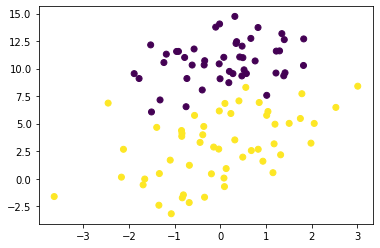

In [2]:
#载入数据

data = np.genfromtxt('LR-testSet.csv', delimiter= ',')
x_data = data[:,:-1]
y_data = data[:, -1]

plt.scatter(x_data[:,0], x_data[:,1], c= y_data)
plt.show()

In [3]:
#创建决策树

model = tree.DecisionTreeClassifier()
model.fit(x_data,y_data)#决策树模型中没有transform


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
import graphviz

dot_data = tree.export_graphviz(model,
                                            out_file = None,
                                            feature_names = ['x','y'],
                                            class_names = ['label1','label0'],
                                            filled = True,
                                            rounded = True,
                                            special_characters = True)
graph = graphviz.Source(dot_data)



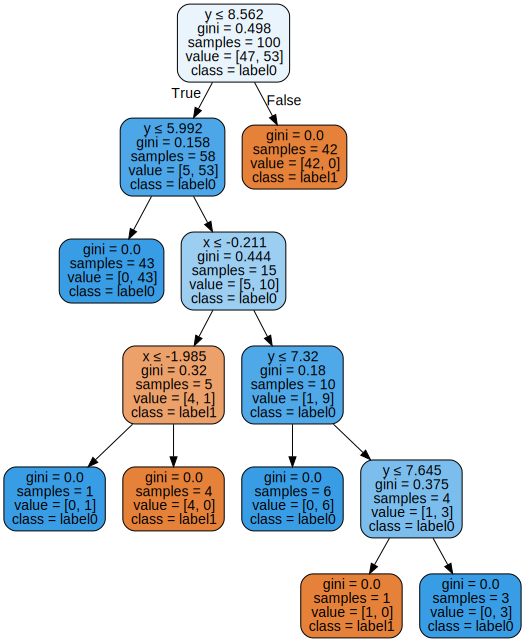

In [10]:
graph

[[-4.642001 -4.181888]
 [-4.622001 -4.181888]
 [-4.602001 -4.181888]
 ...
 [ 3.957999 15.738112]
 [ 3.977999 15.738112]
 [ 3.997999 15.738112]]


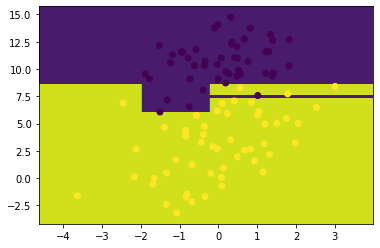

In [17]:
x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
#生成网格矩阵
xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min,y_max,0.02))
# print(xx.shape)
# print(xx.ravel().shape)

z =model.predict(np.c_[xx.ravel(), yy.ravel()])
# print(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx,yy,z)
plt.scatter(x_data[:,0], x_data[:,1], c= y_data)  
plt.show()

In [18]:
predictions = model.predict(x_data)
report = classification_report(y_data,predictions)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

